In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
print(tf.__version__)

2.0.0


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
mnist = keras.datasets.fashion_mnist

In [6]:
type(mnist)

module

In [7]:
(X_train, y_train),(X_test, y_test) = mnist.load_data()

In [8]:
X_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [9]:
np.max(X_train)

255

In [10]:
np.mean(X_train)

72.94035223214286

In [11]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [12]:
class_names = ['top','trouser','pullover','dress','coat','sandal','shirt','sneaker','bag','ankle boot']

#### Data Exploation

In [15]:
X_train.shape

(60000, 28, 28)

In [16]:
X_test.shape

(10000, 28, 28)

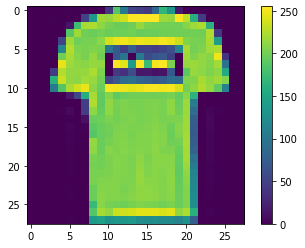

In [20]:
plt.figure()
plt.imshow(X_train[1])
plt.colorbar()

In [18]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [21]:
X_train = X_train/255.0

In [23]:
X_test = X_test/255.0

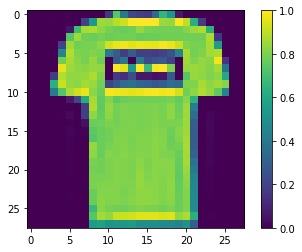

In [24]:
plt.figure()
plt.imshow(X_train[1])
plt.colorbar()

### Build the model with TF 2.0

In [25]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense

In [26]:
model = Sequential()
model.add(Flatten(input_shape = (28,28)))
model.add(Dense(120, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 120)               94200     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1210      
Total params: 95,410
Trainable params: 95,410
Non-trainable params: 0
_________________________________________________________________


#### model compilation
- Loss Function
- Optimizer
- Metrics

In [30]:
model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [32]:
model.fit(X_train, y_train, epochs =10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 7s 116us/sample - loss: 0.4986 - accuracy: 0.8258
Epoch 2/10
60000/60000 [==============================] - 6s 95us/sample - loss: 0.3789 - accuracy: 0.8636
Epoch 3/10
60000/60000 [==============================] - 6s 97us/sample - loss: 0.3389 - accuracy: 0.8757
Epoch 4/10
60000/60000 [==============================] - 6s 95us/sample - loss: 0.3165 - accuracy: 0.8832
Epoch 5/10
60000/60000 [==============================] - 6s 96us/sample - loss: 0.2971 - accuracy: 0.8894
Epoch 6/10
60000/60000 [==============================] - 6s 95us/sample - loss: 0.2842 - accuracy: 0.8947
Epoch 7/10
60000/60000 [==============================] - 6s 96us/sample - loss: 0.2710 - accuracy: 0.9006
Epoch 8/10
60000/60000 [==============================] - 6s 97us/sample - loss: 0.2601 - accuracy: 0.9022
Epoch 9/10
60000/60000 [==============================] - 6s 97us/sample - loss: 0.2505 - accuracy: 0.9055
Epoch 10/10
6

In [33]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(test_acc)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.8857


In [34]:
from sklearn.metrics import accuracy_score

In [35]:
y_pred=model.predict_classes(X_test)

In [36]:
accuracy_score(y_test, y_pred)

0.8857

In [41]:
y_pred

array([9, 2, 1, ..., 8, 1, 5], dtype=int64)

In [39]:
pred = model.predict(X_test)

In [40]:
pred

array([[8.74410517e-08, 4.65960603e-10, 2.10437179e-09, ...,
        2.32444536e-02, 5.49939472e-09, 9.74768400e-01],
       [6.43650419e-05, 7.91449822e-11, 9.94976401e-01, ...,
        3.83438797e-20, 7.17232496e-10, 5.01443180e-13],
       [2.33665904e-08, 1.00000000e+00, 1.12673690e-11, ...,
        6.95206466e-20, 6.37387875e-13, 1.21577249e-18],
       ...,
       [5.45226678e-04, 1.46378992e-10, 3.22719870e-06, ...,
        6.03956989e-12, 9.99263227e-01, 4.26456481e-10],
       [2.22590946e-10, 9.99999762e-01, 1.50388660e-10, ...,
        9.00675544e-15, 3.12453050e-11, 6.38193361e-12],
       [4.55329712e-07, 3.38930350e-09, 1.06662235e-08, ...,
        6.04641333e-04, 1.18266462e-05, 2.26860539e-06]], dtype=float32)

In [43]:
pred[0]

array([8.7441052e-08, 4.6596060e-10, 2.1043718e-09, 1.5484297e-12,
       7.1552424e-11, 1.9870421e-03, 1.4384696e-08, 2.3244454e-02,
       5.4993947e-09, 9.7476840e-01], dtype=float32)

In [44]:
np.argmax(pred[0])

9

In [45]:
np.argmax(pred[1])

2